In [1]:
from matplotlib import pyplot as plt
import numpy as np

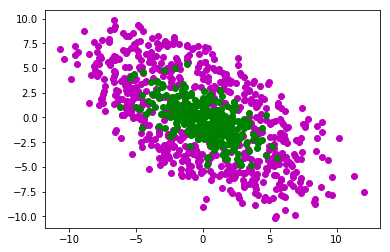

(900, 3)

In [118]:
n = 300
rot = np.array([[1, -1], [1, 1]])/np.sqrt(2)
theta = np.random.uniform(0, 2*np.pi, size=2*n)
r = 4 + 1.2*np.random.normal(size=2*n)
X0 = np.array([2*r*np.cos(theta), r*np.sin(theta)]).T @ rot
X1 = np.random.multivariate_normal([0, 0], 1.5*np.array([[4, 0], [0, 1]]), size=n) @ rot
T = np.concatenate([X0, X1])
X = np.hstack([T, T**2])
y0 = np.zeros(len(X0))
y1 = np.ones(len(X1))
y = np.concatenate([y0, y1])
plt.plot(X0[:,0], X0[:,1], 'mo')
plt.plot(X1[:,0], X1[:,1], 'go')
plt.show()
X = np.hstack([X, (X[:,0]*X[:,1]).reshape(-1, 1)])
data = np.hstack([T, y.reshape(-1, 1)])
np.savetxt("dataset_1.csv", data, delimiter=",", newline="\n")
data.shape

In [5]:
from sklearn.linear_model import LogisticRegression
R = LogisticRegression()
R.fit(X, y)
c = R.coef_[0]
c[0]
d = R.intercept_

In [6]:
x = np.arange(-5, 5, 0.005)
XX, YY = np.meshgrid(x, x)
ZZ = c[0]*XX + c[1]*YY + c[2]*np.square(XX) + c[3]*np.square(YY) + c[4]*XX*YY + d

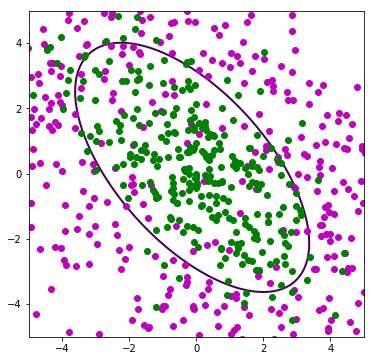

In [7]:
plt.figure(figsize=(6, 6))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.plot(X0[:,0], X0[:,1], 'mo')
plt.plot(X1[:,0], X1[:,1], 'go')
plt.contour(x, x, ZZ, levels=[0], linewidths=[2])
plt.show()

In [8]:
ZZ = YY**2 - XX**3 + XX

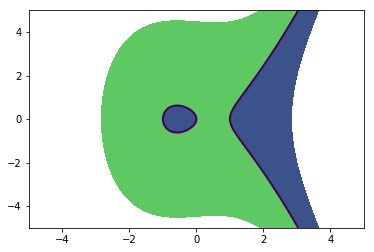

In [9]:
plt.contour(x, x, ZZ, levels=[0], linewidths=[2])
plt.contourf(x, x, ZZ, levels=[-20, 0, 20])
plt.show()

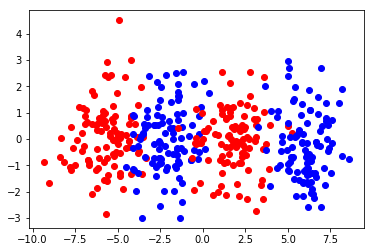

In [119]:
n = 100
X0 = np.random.multivariate_normal([-6, 0], 1.5*np.identity(2), size=n)
X1 = np.random.multivariate_normal([-2, 0], 1.5*np.identity(2), size=n)
X2 = np.random.multivariate_normal([2, 0], 1.5*np.identity(2), size=n)
X3 = np.random.multivariate_normal([6, 0], 1.5*np.identity(2), size=n)
X0123 = np.concatenate([X0, X1, X2, X3])
target = np.concatenate([(i % 2)*np.ones(len(X0)) for i in range(4)])
plt.plot(X0[:,0], X0[:,1], 'ro')
plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'ro')
plt.plot(X3[:,0], X3[:,1], 'bo')
plt.show()
data = np.hstack([X0123, target.reshape(-1, 1)])
np.savetxt("dataset_2.csv", data, delimiter=",", newline="\n")


In [11]:
x = X0123[:,0]
y = X0123[:,1]
xx = x*x
xy = x*y
yy = y*y
xxx = x*x*x
xxy = x*x*y
xyy = x*y*y
yyy = y*y*y
predictors = np.array([x, y, xx, xy, yy, xxx, xxy, xyy, yyy]).T

In [12]:
from sklearn.linear_model import LogisticRegression
R = LogisticRegression()
R.fit(predictors, target)
c = R.coef_[0]
d = R.intercept_

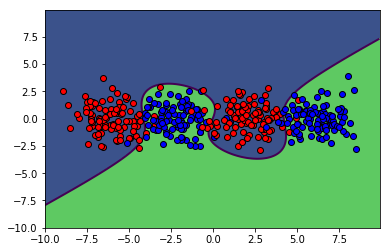

In [13]:
x = np.arange(-10, 10, 0.1)
XX, YY = np.meshgrid(x, x)
ZZ = c[0]*XX + c[1]*YY + c[2]*XX*XX + c[3]*XX*YY + c[4]*YY*YY + c[5]*XX*XX*XX + c[6]*XX*XX*YY + c[7]*XX*YY*YY + c[8]*YY*YY*YY + d
plt.contourf(XX, YY, ZZ, levels=[-500, 0, 500])
plt.contour(XX, YY, ZZ, levels=[0], linewidths=[2])
plt.plot(X0[:,0], X0[:,1], 'ro', markeredgecolor='k', markeredgewidth=1)
plt.plot(X1[:,0], X1[:,1], 'bo', markeredgecolor='k', markeredgewidth=1)
plt.plot(X2[:,0], X2[:,1], 'ro', markeredgecolor='k', markeredgewidth=1)
plt.plot(X3[:,0], X3[:,1], 'bo', markeredgecolor='k', markeredgewidth=1)
plt.show()

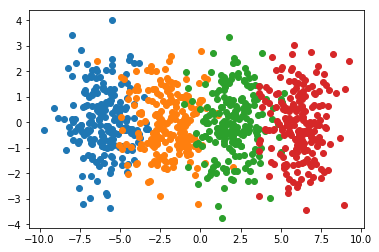

(800,)

In [123]:
n = 200
X0 = np.random.multivariate_normal([-6, 0], 1.5*np.identity(2), size=n)
X1 = np.random.multivariate_normal([-2, 0], 1.5*np.identity(2), size=n)
X2 = np.random.multivariate_normal([2, 0], 1.5*np.identity(2), size=n)
X3 = np.random.multivariate_normal([6, 0], 1.5*np.identity(2), size=n)
X = np.concatenate([X0, X1, X2, X3])
y = np.concatenate([i*np.ones(len(X0)) for i in range(4)])
plt.plot(X0[:,0], X0[:,1], 'o')
plt.plot(X1[:,0], X1[:,1], 'o')
plt.plot(X2[:,0], X2[:,1], 'o')
plt.plot(X3[:,0], X3[:,1], 'o')
plt.show()
data = np.hstack([X, y.reshape(-1, 1)])
np.savetxt("dataset_3.csv", data, delimiter=",", newline="\n")
y.shape

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
R = LogisticRegression(multi_class="ovr")
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25)
R.fit(X_tr, y_tr)
y_pr = R.predict(X_te)

In [58]:
np.sum(y_pr == y_te)/len(y_te)

0.84

In [98]:
X0 = X_te[y_te == 0]
X1 = X_te[y_te == 1]
X2 = X_te[y_te == 2]
X3 = X_te[y_te == 3]
X_bad = X_te[y_pr != y_te]

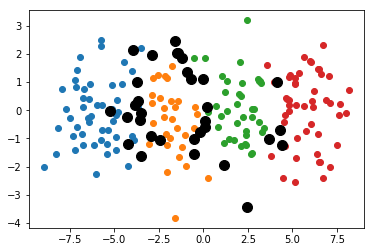

In [99]:
plt.plot(X0[:,0], X0[:,1], 'o')
plt.plot(X1[:,0], X1[:,1], 'o')
plt.plot(X2[:,0], X2[:,1], 'o')
plt.plot(X3[:,0], X3[:,1], 'o')
plt.plot(X_bad[:,0], X_bad[:,1], 'ok', markersize=10)
plt.show()

In [106]:
x = np.arange(-10, 10, 0.001)
XX, YY = np.meshgrid(x, x)
XY = np.array([YY, XX]).T
XY.shape

(20000, 20000, 2)

In [107]:
P = np.array([R.predict(XY[i, :, :]) for i in range(len(x))])

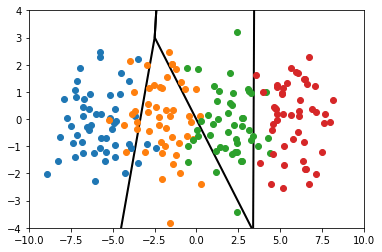

In [108]:
plt.plot(X0[:,0], X0[:,1], 'o')
plt.plot(X1[:,0], X1[:,1], 'o')
plt.plot(X2[:,0], X2[:,1], 'o')
plt.plot(X3[:,0], X3[:,1], 'o')
plt.ylim(-4, 4)
plt.contour(x, x, P, levels=[0.5, 1.5, 2.5], colors=['k', 'k', 'k', 'k'], linewidths=[2, 2, 2, 2])
plt.show()

In [72]:
x = np.array([np.ones((3, 4)) for i in range(2)])

In [75]:
x.T.shape

(4, 3, 2)